In [2]:
# 18.05.2024
# обновлена схема, построены графики для пилотного сигнала

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
%matplotlib widget

### Канал SIMO

In [3]:
hD = pd.read_csv('..\\WLAN_std_channels\\WLAN_modelD.txt', sep=',', skiprows=[1],header=0, skipinitialspace=True)
hE = pd.read_csv('..\\WLAN_std_channels\\WLAN_modelE.txt', sep=',', skiprows=[1],header=0, skipinitialspace=True)
hB = pd.read_csv('..\\WLAN_std_channels\\WLAN_modelB.txt', sep=',', skiprows=[1],header=0, skipinitialspace=True)

In [4]:
hB.head()

,time_delay,power_gain
0,0,0.0
1,10,-5.4
2,20,-2.5
3,30,-5.9
4,40,-9.2


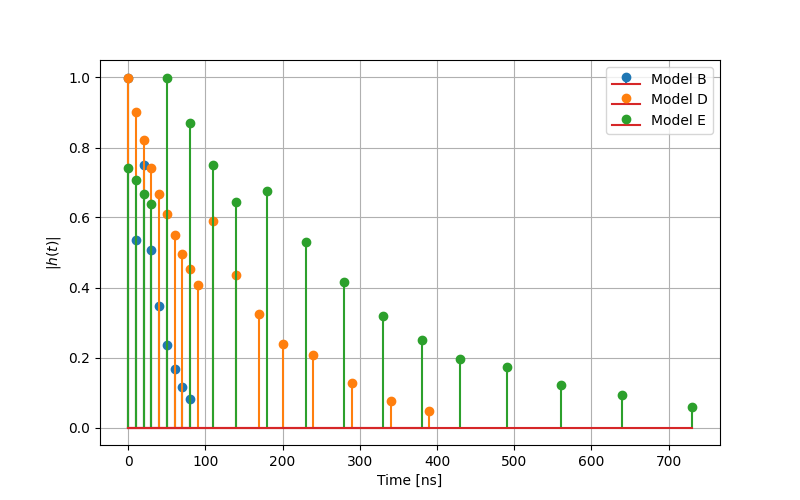

In [5]:
fig1 = plt.figure(figsize=(8,5))
ax_1 = fig1.add_subplot(111)
ax_1.stem(hB['time_delay'], 10**(hB['power_gain']/20), linefmt='C0-', markerfmt='C0o', label='Model B')
ax_1.stem(hD['time_delay'], 10**(hD['power_gain']/20), linefmt='C1-', markerfmt='C1o', label='Model D')
ax_1.stem(hE['time_delay'], 10**(hE['power_gain']/20), linefmt='C2-', markerfmt='C2o', label='Model E')
ax_1.set_ylabel(r"$|h(t)|$")
ax_1.set_xlabel("Time [ns]")
ax_1.grid()
ax_1.legend()

plt.show()

### Профиль рассеяния 2х2

In [11]:
delta_t=50 # ns

In [6]:
h11 = pd.read_csv('h11.txt', sep=',',header=None, skipinitialspace=True, names=['re', 'im'])
h12 = pd.read_csv('h12.txt', sep=',',header=None, skipinitialspace=True, names=['re', 'im'])
h21 = pd.read_csv('h21.txt', sep=',',header=None, skipinitialspace=True, names=['re', 'im'])
h22 = pd.read_csv('h22.txt', sep=',',header=None, skipinitialspace=True, names=['re', 'im'])

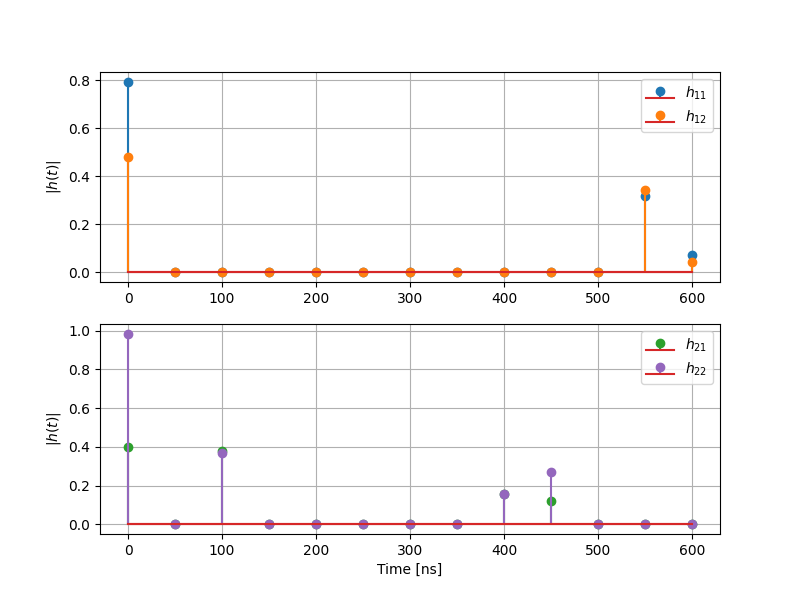

In [16]:
fig2 = plt.figure(figsize=(8,6))
ax_1 = fig2.add_subplot(211)
ax_1.stem(h11.index*delta_t, np.sqrt(h11['re']**2+h11['im']**2), linefmt='C0-', markerfmt='C0o', label=r'$h_{11}$')
ax_1.stem(h12.index*delta_t, np.sqrt(h12['re']**2+h12['im']**2), linefmt='C1-', markerfmt='C1o', label=r'$h_{12}$')
ax_1.set_ylabel(r"$|h(t)|$")
#ax_1.set_xlabel("Time [ns]")
ax_1.grid()
ax_1.legend()

ax_2 = fig2.add_subplot(212)
ax_2.stem(h21.index*delta_t, np.sqrt(h21['re']**2+h21['im']**2), linefmt='C2-', markerfmt='C2o', label=r'$h_{21}$')
ax_2.stem(h22.index*delta_t, np.sqrt(h22['re']**2+h22['im']**2), linefmt='C4-', markerfmt='C4o', label=r'$h_{22}$')
ax_2.set_ylabel(r"$|h(t)|$")
ax_2.set_xlabel("Time [ns]")
ax_2.grid()
ax_2.legend()

plt.show()